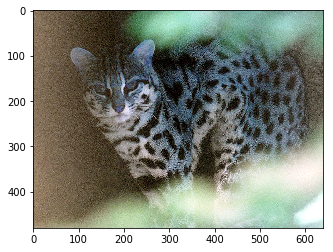

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread('yamaneko.jpg')

pixels=[]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixels.append(img[i,j])

plt.imshow(img)
plt.show()

In [ ]:
# Note: img's shape is (width, height, cahnnel) (denoted as (0,1,2))
# However, CNN model of torch requires inputs with shape (channel, width, height). That is, (2,0,1) 
# This problem is solved by np.transpose()

In [15]:
import torch

# 0: cat , 1: dog

X=torch.zeros(25000,3,224,224)
t=torch.zeros(25000)
n_cat=12500
n_dog=12500

for i in range(n_cat):
    t[i]=0
    
    img=cv2.imread('train\cat.'+str(i)+'.jpg')
    img=cv2.resize(img,dsize=(224,224))
    
    img=np.transpose(img,(2,0,1))
    
    img=torch.Tensor(img/255)
    
    X[i]=img
    
    if (i+1)%1000==0:
        print('Now processing ',i,'-th image')
        
for i in range(n_dog):
    t[i+12500]
    
    img=cv2.imread('train\dog.'+str(i)+'.jpg')
    img=cv2.resize(img,dsize=(224,224))
    
    img=np.transpose(img,(2,0,1))

    img=torch.Tensor(img/255)
    
    X[i+12500]=img
    
    if (i+1)%1000==0:
        print('Now processing ',i,'-th image')    

Now processing  999 -th image
Now processing  1999 -th image
Now processing  2999 -th image
Now processing  3999 -th image
Now processing  4999 -th image
Now processing  5999 -th image
Now processing  6999 -th image
Now processing  7999 -th image
Now processing  8999 -th image
Now processing  9999 -th image
Now processing  10999 -th image
Now processing  11999 -th image
Now processing  999 -th image
Now processing  1999 -th image
Now processing  2999 -th image
Now processing  3999 -th image
Now processing  4999 -th image
Now processing  5999 -th image
Now processing  6999 -th image
Now processing  7999 -th image
Now processing  8999 -th image
Now processing  9999 -th image
Now processing  10999 -th image
Now processing  11999 -th image


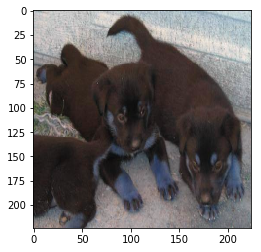

In [19]:
plt.imshow(np.transpose(X[13000],(1,2,0)))
plt.show()

In [5]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [6]:
net=AlexNet(num_classes=2)

In [7]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [20]:
for i in range(10):
    optimizer.zero_grad()
    outputs=net(X)
    loss=criterion(outputs,t)
    print(loss)
    loss.backward()
    optimizer.step()

RuntimeError: $ Torch: not enough memory: you tried to allocate 102GB. Buy new RAM! at ..\aten\src\TH\THGeneral.cpp:201

In [11]:
X.size()

torch.Size([25000, 224, 224, 3])

In [13]:
print(torch.transpose(X[0],dim1).size())

NameError: name 'dim1' is not defined